<a href="https://colab.research.google.com/github/epifano-x/trabalho-scikit-learn-SIA/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Lendo o arquivo CSV
base = pd.read_csv("dataset.csv")

# Filtrando apenas as colunas numéricas para calcular a correlação
colunas_numericas = base.select_dtypes(include=[int, float]).columns
x = base[colunas_numericas]

# Convertendo a variável alvo para valores numéricos
le = LabelEncoder()
y = le.fit_transform(base.iloc[:, -1])

# Calculando a matriz de correlação entre os atributos numéricos e a variável alvo
matriz_correlacao = x.corrwith(pd.Series(y))

print(matriz_correlacao)


Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mothers qualification                            -0.038346
Fathers qualification                             0.000329
Mothers occupation                                0.048424
Fathers occupation                                0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Lendo o arquivo CSV
base = pd.read_csv("dataset.csv")

# Transformando todas as colunas em numéricas (exceto a última coluna "Target")
base.iloc[:, :-1] = base.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

# Convertendo a coluna "Target" para números usando LabelEncoder
le = LabelEncoder()
base.iloc[:, -1] = le.fit_transform(base.iloc[:, -1])

# Filtrando apenas as colunas numéricas para calcular a correlação
colunas_numericas = base.select_dtypes(include=[int, float]).columns
x = base[colunas_numericas]

# Calculando a matriz de correlação de Pearson entre os atributos numéricos e a variável alvo
correlacao_pearson = x.corrwith(base.iloc[:, -1])

# Ordenando os resultados em ordem decrescente
correlacao_pearson_sorted = correlacao_pearson.sort_values(ascending=False)

print(correlacao_pearson_sorted)


Target                                 1.000000
Curricular units 2nd sem (approved)    0.624157
Curricular units 1st sem (approved)    0.529123
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 1st sem (enrolled)    0.155974
Displaced                              0.113986
Application mode                      -0.212025
Gender                                -0.229270
Debtor                                -0.240999
Age at enrollment                     -0.243438
dtype: float64


<ipython-input-1-895b07413df7>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  base.iloc[:, -1] = le.fit_transform(base.iloc[:, -1])


-----------------------------------------------------------------------------------------------------


# **1.1 Árvore de Decisão CART (padrão).**


Acurácia: 85.08474576271186 %

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.86      0.86      0.86       296
    Enrolled       0.83      0.84      0.84       305
    Graduate       0.86      0.85      0.86       284

    accuracy                           0.85       885
   macro avg       0.85      0.85      0.85       885
weighted avg       0.85      0.85      0.85       885



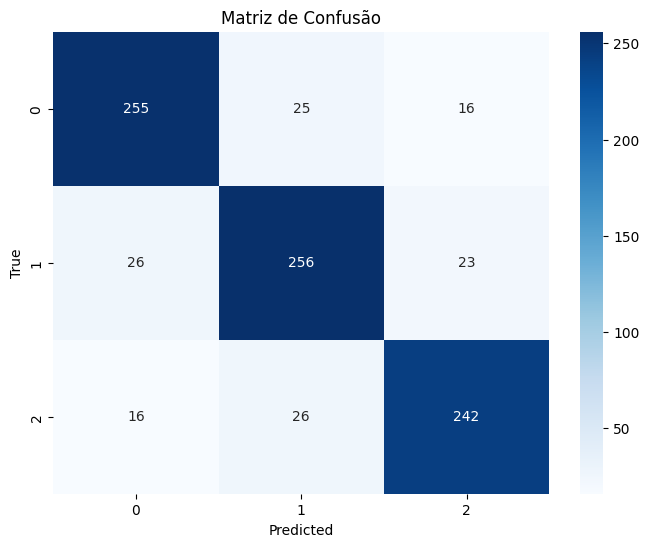

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: Carregar o arquivo CSV
data = pd.read_csv("datasetbalanceadonormalizado.csv")

# Passo 2: Separar os atributos (X) da variável alvo (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Passo 3: Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=412)

# Passo 4: Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Passo 5: Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Passo 6: Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy*100,"%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Passo 7: Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------
# **1.2 Support Vector Machine (padrão).**


Acurácia do modelo SVM: 79.32%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.90      0.77      0.83       322
    Enrolled       0.71      0.77      0.74       279
    Graduate       0.79      0.84      0.81       284

    accuracy                           0.79       885
   macro avg       0.80      0.79      0.79       885
weighted avg       0.80      0.79      0.79       885



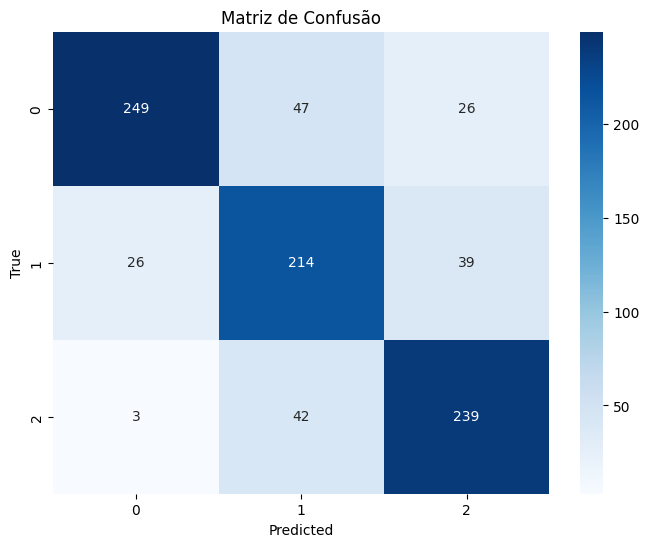

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Carregar o dataset do arquivo CSV
# Certifique-se de que o arquivo está no mesmo diretório ou forneça o caminho completo para ele
data = pd.read_csv('datasetbalanceadobinario.csv')

# Separar os atributos (features) da classe (target)
X = data.drop('Target', axis=1)
y = data['Target']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# Inicializar o modelo SVM
svm_model = SVC()

# Treinar o modelo SVM com os dados de treinamento
svm_model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = svm_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo SVM: {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Passo 7: Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


-----------------------------------------------------------------------------------------------------------------------------------
# **1.3 Support Vector Machine (mudando o kernel por outro).**
kernel Linear

Acurácia do modelo SVM com kernel Linear: 72.66%

Relatório de Classificação com kernel Linear:
              precision    recall  f1-score   support

     Dropout       0.81      0.71      0.76       294
    Enrolled       0.65      0.58      0.61       293
    Graduate       0.72      0.89      0.79       298

    accuracy                           0.73       885
   macro avg       0.73      0.73      0.72       885
weighted avg       0.73      0.73      0.72       885



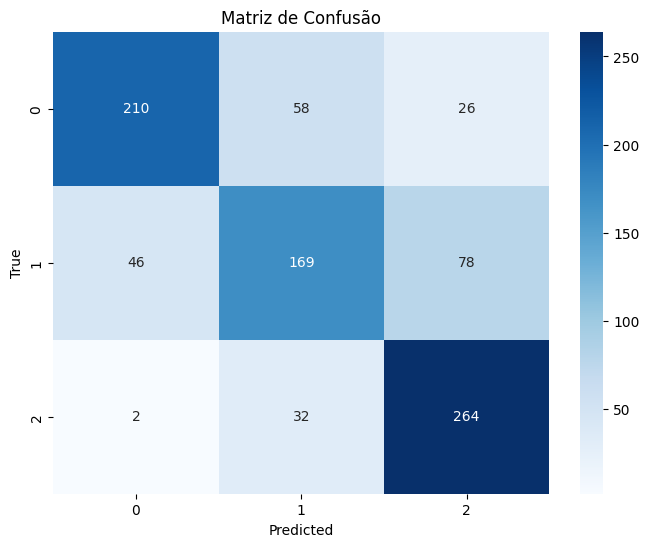

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar o dataset do arquivo CSV
# Certifique-se de que o arquivo está no mesmo diretório ou forneça o caminho completo para ele
data = pd.read_csv('datasetbalanceadonormalizado.csv')

# Separar os atributos (features) da classe (target)
X = data.drop('Target', axis=1)
y = data['Target']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Inicializar o modelo SVM com kernel Linear
svm_model_linear = SVC(kernel='linear')

# Treinar o modelo SVM com kernel Linear usando os dados de treinamento
svm_model_linear.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado com kernel Linear
y_pred_linear = svm_model_linear.predict(X_test)

# Avaliar o desempenho do modelo com kernel Linear
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Acurácia do modelo SVM com kernel Linear: {:.2f}%".format(accuracy_linear * 100))

# Exibir o relatório de classificação com kernel Linear
print("\nRelatório de Classificação com kernel Linear:")
print(classification_report(y_test, y_pred_linear))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


--------------------------------------------------------------------------------------------------------------------------------
# **1.4 Knn (padrão k=5)**


Acurácia do modelo KNN: 75.71%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.83      0.71      0.77       294
    Enrolled       0.68      0.74      0.71       293
    Graduate       0.78      0.82      0.80       298

    accuracy                           0.76       885
   macro avg       0.76      0.76      0.76       885
weighted avg       0.76      0.76      0.76       885



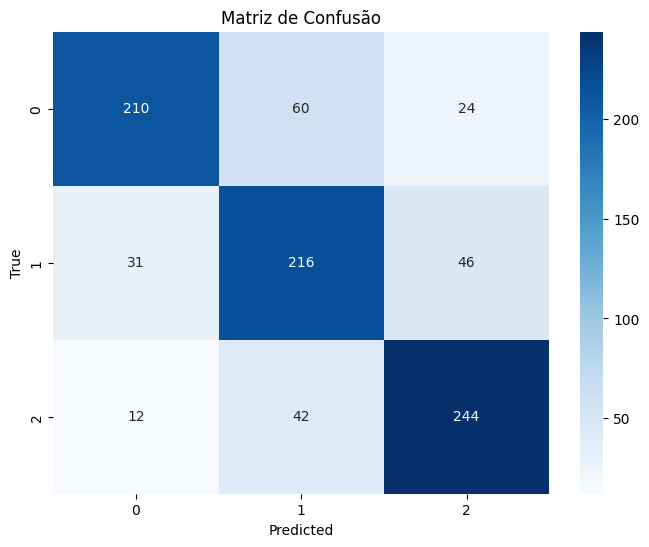

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar o dataset do arquivo CSV
# Certifique-se de que o arquivo está no mesmo diretório ou forneça o caminho completo para ele
data = pd.read_csv('datasetbalanceadobinario.csv')

# Separar os atributos (features) da classe (target)
X = data.drop('Target', axis=1)
y = data['Target']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Inicializar o modelo KNN com k=5 (valor padrão)
knn_model = KNeighborsClassifier()

# Treinar o modelo KNN usando os dados de treinamento
knn_model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = knn_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN: {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


---------------------------------------------------------------------------------------------------------------------
# **1.5 Knn (mudando o valor de k=1)**

Acurácia do modelo KNN com k=1: 84.07%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.92      0.84      0.88       319
    Enrolled       0.79      0.85      0.82       274
    Graduate       0.81      0.84      0.82       292

    accuracy                           0.84       885
   macro avg       0.84      0.84      0.84       885
weighted avg       0.84      0.84      0.84       885



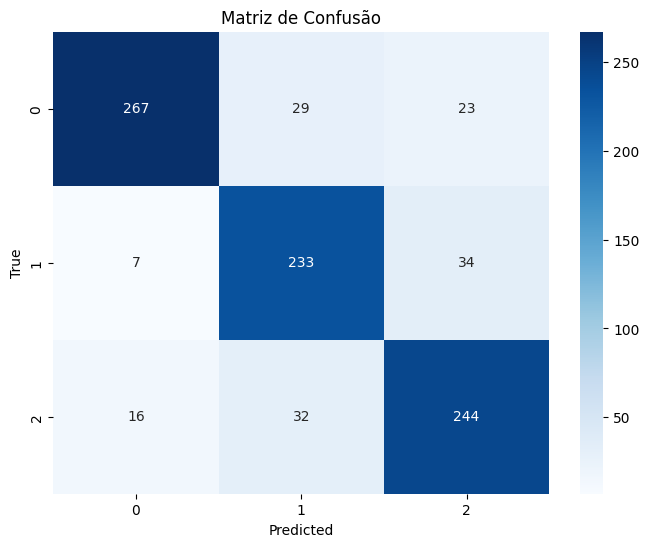

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar o dataset do arquivo CSV
# Certifique-se de que o arquivo está no mesmo diretório ou forneça o caminho completo para ele
data = pd.read_csv('datasetbalanceadobinario.csv')

# Separar os atributos (features) da classe (target)
X = data.drop('Target', axis=1)
y = data['Target']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo KNN com k=10 (um valor diferente)
knn_model = KNeighborsClassifier(n_neighbors=1)

# Treinar o modelo KNN usando os dados de treinamento
knn_model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = knn_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN com k=1: {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


----------------------------------------------------------------------------------------------------------------------------
# **1.6 Knn (mudando a medida de distância "Chebyshev")**


Acurácia do modelo KNN com distância de Chebyshev: 82.26%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.88      0.82      0.85       294
    Enrolled       0.77      0.85      0.81       293
    Graduate       0.83      0.80      0.82       298

    accuracy                           0.82       885
   macro avg       0.83      0.82      0.82       885
weighted avg       0.83      0.82      0.82       885



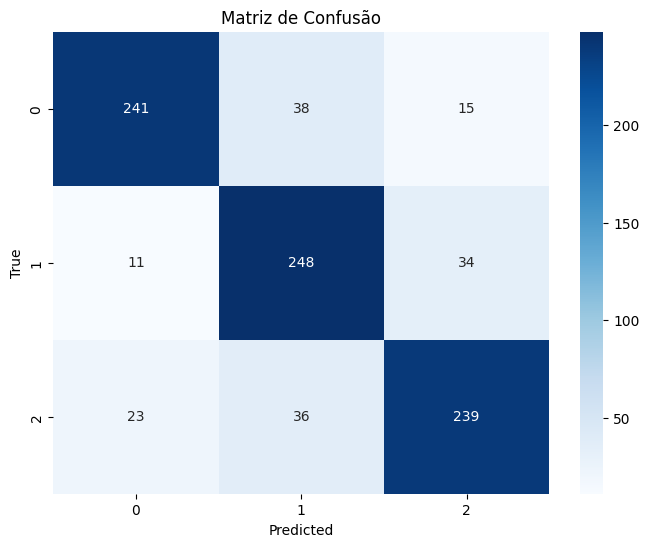

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar o dataset do arquivo CSV
# Certifique-se de que o arquivo está no mesmo diretório ou forneça o caminho completo para ele
data = pd.read_csv('datasetbalanceado.csv')

# Separar os atributos (features) da classe (target)
X = data.drop('Target', axis=1)
y = data['Target']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Inicializar o modelo KNN com k=5 (valor padrão) e distância de Chebyshev
knn_model = KNeighborsClassifier(n_neighbors=1, p=float('inf'))  # p=float('inf') indica a distância de Chebyshev (L∞)

# Treinar o modelo KNN usando os dados de treinamento
knn_model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = knn_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN com distância de Chebyshev: {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


-----------------------------------------------------------------------------------------------------------------------------------
# **1.7 Gaussian Naive Bayes (padrão).**


Acurácia do modelo Gaussian Naive Bayes: 66.89%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.77      0.68      0.72       322
    Enrolled       0.55      0.52      0.54       279
    Graduate       0.68      0.80      0.73       284

    accuracy                           0.67       885
   macro avg       0.67      0.67      0.66       885
weighted avg       0.67      0.67      0.67       885



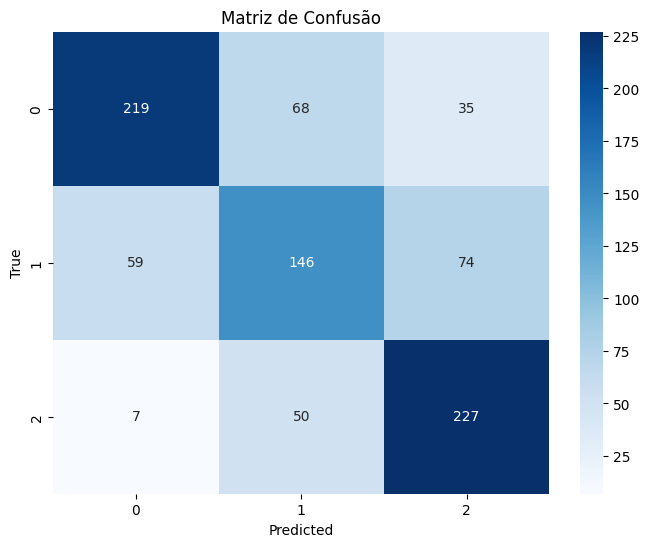

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar o dataset do arquivo CSV
# Certifique-se de que o arquivo está no mesmo diretório ou forneça o caminho completo para ele
data = pd.read_csv('datasetbalanceadonormalizado.csv')

# Separar os atributos (features) da classe (target)
X = data.drop('Target', axis=1)
y = data['Target']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# Inicializar o modelo Gaussian Naive Bayes
gnb_model = GaussianNB()

# Treinar o modelo Gaussian Naive Bayes usando os dados de treinamento
gnb_model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = gnb_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gaussian Naive Bayes: {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------
# **1.8 Categorical Naive Bayes (padrão).**

Acurácia do modelo Categorical Naive Bayes: 70.62%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.79      0.74      0.76       322
    Enrolled       0.62      0.62      0.62       279
    Graduate       0.71      0.76      0.73       284

    accuracy                           0.71       885
   macro avg       0.70      0.70      0.70       885
weighted avg       0.71      0.71      0.71       885



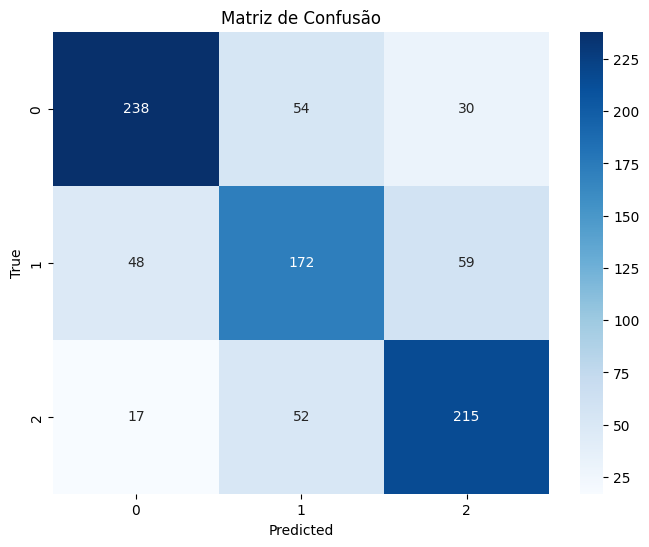

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

# Carregar o dataset do arquivo CSV
# Certifique-se de que o arquivo está no mesmo diretório ou forneça o caminho completo para ele
data = pd.read_csv('datasetbalanceado.csv')

# Definir a coluna alvo (target)
target_col = 'Target'  # Substitua 'Target' pelo nome da coluna que contém a classe

# Dividir o dataset em conjuntos de treinamento e teste (opcional)
# Se você já tiver o conjunto de teste, pode pular essa etapa
data_train, data_test = train_test_split(data, test_size=0.2, random_state=142)

# Separar os atributos (features) da classe (target)
X_train = data_train.drop(target_col, axis=1)
y_train = data_train[target_col]

X_test = data_test.drop(target_col, axis=1)
y_test = data_test[target_col]

# Inicializar o modelo Categorical Naive Bayes
cnb_model = CategoricalNB()

# Treinar o modelo Categorical Naive Bayes usando os dados de treinamento
cnb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = cnb_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo Categorical Naive Bayes: {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, predictions))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------
# **1.9 Regressão Linear (quadrados mínimos).**


Acurácia do modelo Regressão Linear (quadrados mínimos): 68.04%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.86      0.60      0.70       308
    Enrolled       0.54      0.81      0.65       335
    Graduate       0.82      0.62      0.71       330

    accuracy                           0.68       973
   macro avg       0.74      0.68      0.69       973
weighted avg       0.73      0.68      0.69       973



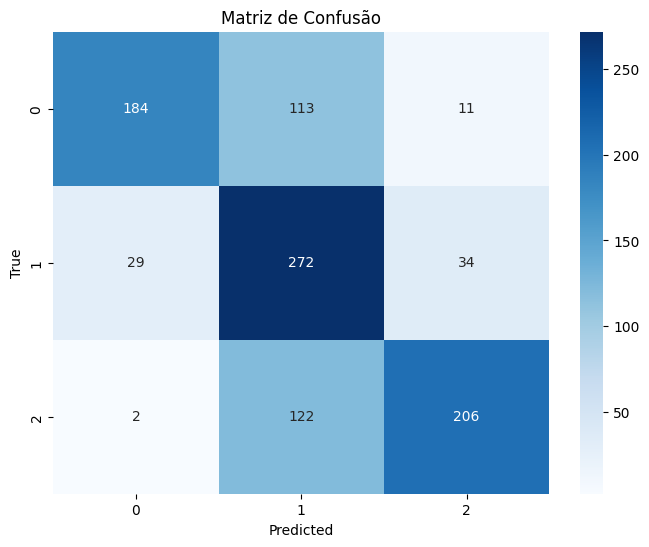

In [ ]:
import pandas as pd
base=pd.read_csv("datasetbalanceadobinario.csv")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
x=base[base.columns[0:-1]]
y=base[base.columns[-1:]]
from sklearn.model_selection import train_test_split
[x_train,x_test,y_train,y_test]=train_test_split(x,y,test_size=0.22)
y_train=y_train.replace("Graduate",2)
y_train=y_train.replace("Enrolled",1)
y_train=y_train.replace("Dropout",0)

from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
p=lin.predict(x_test)
predictions=list()
for index , x in enumerate( p):
  infe=abs(0-x)
  meio=abs(1-x)
  sup=abs(2-x)
  if infe<meio:
    if infe<sup:
      predictions.append("Dropout")
    elif sup < meio:
      predictions.append("Graduate")
    else:
      predictions.apped("Enrolled")
  elif meio < sup:
    predictions.append("Enrolled")
  else:
    predictions.append("Graduate")

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo Regressão Linear (quadrados mínimos): {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------
# **1.10 Perceptron.**

Acurácia do modelo Perceptron: 69.08%

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.85      0.66      0.74       300
    Enrolled       0.61      0.51      0.56       263
    Graduate       0.64      0.90      0.75       278

    accuracy                           0.69       841
   macro avg       0.70      0.69      0.68       841
weighted avg       0.71      0.69      0.69       841



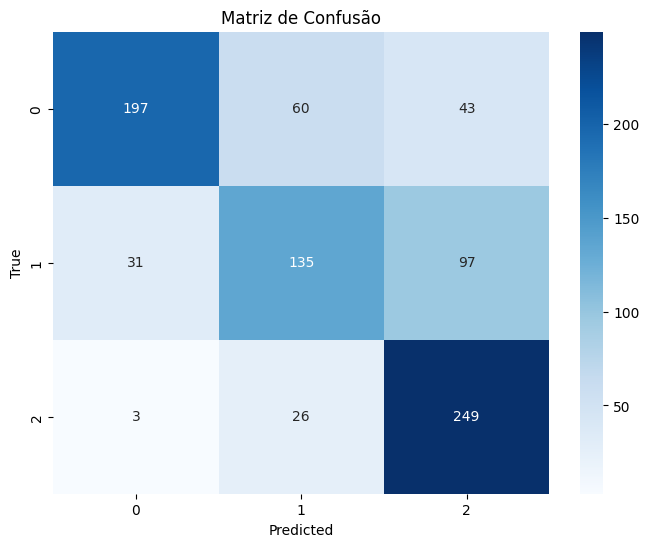

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Carregar o dataset do arquivo CSV
data = pd.read_csv('datasetbalanceadonormalizado.csv')

# Separar os atributos (features) da classe (target)
X = data.drop('Target', axis=1)
y = data['Target']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=42)

# Inicializar o modelo Perceptron
perceptron_model = Perceptron()

# Treinar o modelo Perceptron usando os dados de treinamento
perceptron_model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = perceptron_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Perceptron: {:.2f}%".format(accuracy * 100))

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()